### Binary Classification

#### Notation

$$
\mathcal D = (\mathbf x, y) \quad
\mathbf x \in \mathbb R \quad
y \in \{0, 1\}
$$
$$
\mathcal D = \{
    (\mathbf x^{(1)}, y^{(1)}),
    (\mathbf x^{(2)}, y^{(2)}),
    \cdots,
    (\mathbf x^{(m)}, y^{(m)})
\}
$$
$$
\mathbf X =
\begin{bmatrix}
    \vert & \vert && \vert\\
    \mathbf x^{(1)} & \mathbf x^{(2)} & \cdots & \mathbf x^{(m)} \\
    \vert & \vert && \vert\\
\end{bmatrix}_{n_{\mathbf x} \times m}
$$
$$
\mathbf Y =
\begin{bmatrix}
    y^{(1)} & 
    y^{(2)} & 
    \cdots  &
    y^{(m)}
\end{bmatrix}_{1 \times m}
$$

### Logistic Regression

Given $\mathbf x$, want $\hat y = P(y=1|\mathbf x)$.

Linear regression\
$\hat{y} = \mathbf w^\intercal \mathbf x + b$

Logistic regression\
$\hat{y} = \sigma(\mathbf w^\intercal \mathbf x + b)$

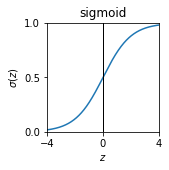

In [3]:
import matplotlib.pyplot as plt
import numpy as np

z = np.linspace(-4, 4, 801)
y = 1 / (1 + np.exp(-z))

plt.figure(figsize=(2,2))
plt.title('sigmoid')
plt.plot(z,y)
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma(z)$')
plt.xlim(-4, 4)
plt.ylim( 0, 1)
plt.xticks([-4,0,4])
plt.yticks([0,.5,1])
plt.show()

#### Loss Function ($L$)

Given
$
\mathcal D = \{
    (\mathbf x^{(1)}, y^{(1)}),
    (\mathbf x^{(2)}, y^{(2)}),
    \cdots,
    (\mathbf x^{(m)}, y^{(m)})
\}
$, want $\hat y^{(i)} \approx y^{(i)}$.

MSE\
$\mathcal L(\hat y, y) = (y - \hat y)^2$

Cross-entropy\
$\mathcal L(\hat y, y) = -[y \, log(\hat y) + (1-y)log(1-\hat y)]$

#### Cost Function ($J$) (which is an average of $L$)

$J(\theta) = J(\mathbf w, b) = \dfrac{1}{m} \sum \limits_{i=1}^{m} \mathcal L(\hat y^{(i)}, y^{(i)})$

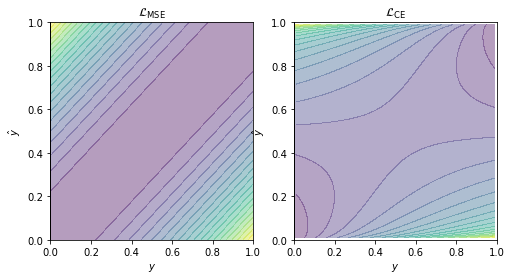

In [4]:
import matplotlib.pyplot as plt
import numpy as np

l = np.linspace(0, 1, 101)
y_mesh, y_hat_mesh = np.meshgrid(l, l)
L = (y_mesh - y_hat_mesh)**2

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title(r'$\mathcal{L}_{\mathrm{MSE}}$')
plt.contourf(y_mesh, y_hat_mesh, L, levels=20, alpha=.4)
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.xlim(0,1)
plt.ylim(0,1)

e = 1e-2
l = np.linspace(0+e, 1-e, 101)
y_mesh, y_hat_mesh = np.meshgrid(l, l)
L = -(y_mesh * np.log(y_hat_mesh) + (1-y_mesh)*np.log(1-y_hat_mesh))

plt.subplot(1,2,2)
plt.title(r'$\mathcal{L}_{\mathrm{CE}}$')
plt.contourf(y_mesh, y_hat_mesh, L, levels=20, alpha=.4)
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()